In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [ ]:
model=load_model('models/DenseNetLSTM_model.h5',compile=False)
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [6]:
class_labels=['battery', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'plastic', 'shoes', 'white-glass']
print(class_labels)

['battery', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'plastic', 'shoes', 'white-glass']


---

In [7]:
base_dir='user_input'
os.listdir(base_dir)

['battery',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'plastic',
 'shoes',
 'white-glass']

In [9]:
class_folder='battery'

os.listdir(os.path.join(base_dir,class_folder))

['battery (1).jpg',
 'battery (10).jpg',
 'battery (11).jpg',
 'battery (12).jpg',
 'battery (2).jpg',
 'battery (3).jpg',
 'battery (4).jpg',
 'battery (5).jpg',
 'battery (6).jpg',
 'battery (7).jpg',
 'battery (8).jpg',
 'battery (9).jpg']

In [24]:
filename='battery (12).jpg'
filepath=os.path.join(base_dir,class_folder,filename)
print(filepath)

user_input\battery\battery (12).jpg


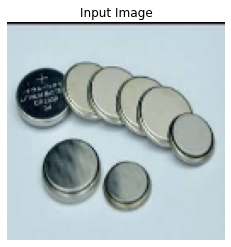

In [25]:
image=cv2.imread(filepath)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(128,128))
plt.imshow(image)
plt.axis('off')
plt.title(label='Input Image')
plt.show()

In [26]:
image=np.array(image)
image=image/255.0
image=np.expand_dims(image,axis=0)
print(image.shape)

(1, 128, 128, 3)


In [27]:
model_pred=model.predict(image,verbose=0)
model_pred

array([[9.9839407e-01, 5.3970043e-06, 8.6861464e-06, 3.6247715e-05,
        1.5572526e-06, 1.0579536e-03, 5.1637553e-06, 4.5946141e-04,
        3.1583364e-05]], dtype=float32)

In [28]:
class_name=np.argmax(model_pred)
print(class_name)

0


In [29]:
class_label=class_labels[class_name]
print(class_label)

battery
